<a href="https://colab.research.google.com/github/Vamshi-B558/PRODIGY_Machine-Learning/blob/main/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
import matplotlib.pyplot as plt
import string

In [4]:
train_df = pd.read_csv("/content/sign_mnist_train.csv", delimiter=',')
test_df = pd.read_csv("/content/sign_mnist_test.csv", delimiter=',')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [5]:
X_train, y_train = np.array(train_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(train_df.label).astype('float64')
X_test, y_test = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(test_df.label).astype('float64')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6218, 28, 28) (6218,)
(6214, 28, 28) (6214,)


In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

train_generator = train_datagen.flow(x=np.expand_dims(X_train, axis=-1), y=y_train,
                  batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow(x=np.expand_dims(X_test, axis=-1), y=y_test,
                  batch_size=32)

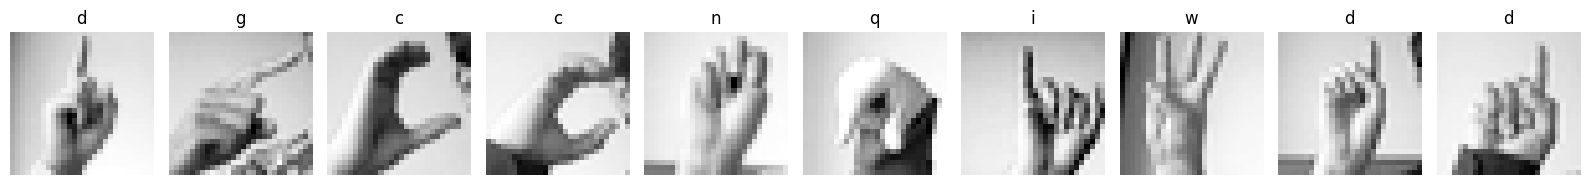

In [7]:
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(X_train, y_train)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

tf.random.set_seed(1234)

model = tf.keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(25, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [9]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
195/195 [==============================] - 10s 43ms/step - loss: nan - accuracy: 0.0553 - val_loss: nan - val_accuracy: 0.0447
Epoch 2/15
195/195 [==============================] - 7s 37ms/step - loss: nan - accuracy: 0.0434 - val_loss: nan - val_accuracy: 0.0447
Epoch 3/15
195/195 [==============================] - 9s 44ms/step - loss: nan - accuracy: 0.0434 - val_loss: nan - val_accuracy: 0.0447
Epoch 4/15
195/195 [==============================] - 7s 36ms/step - loss: nan - accuracy: 0.0434 - val_loss: nan - val_accuracy: 0.0447
Epoch 5/15
195/195 [==============================] - 11s 55ms/step - loss: nan - accuracy: 0.0434 - val_loss: nan - val_accuracy: 0.0447
Epoch 6/15
195/195 [==============================] - 9s 48ms/step - loss: nan - accuracy: 0.0434 - val_loss: nan - val_accuracy: 0.0447
Epoch 7/15
195/195 [==============================] - 7s 36ms/step - loss: nan - accuracy: 0.0434 - val_loss: nan - val_accuracy: 0.0447
Epoch 8/15
195/195 [===================

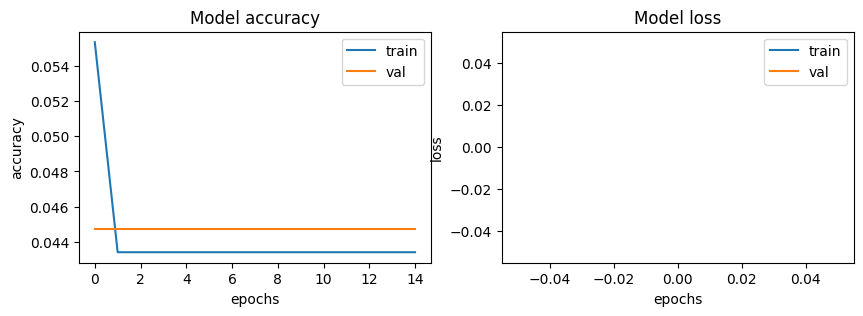

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])